# Nearest Neighbors: Regression

## Objectif:
Predire la ```temperature moyenne``` de la région de Jaipur en Inde à travers les prévisions météorologiques recolté depuis le 1er mai 2016 au 11 mars 2018.

## Importation des modules:

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [23]:
# %matplotlib tk

## Chargement du dataset:

In [24]:
previsio_meteo = pd.read_csv("../../datasets/JaipurFinalCleanData.csv")

## Exploration des données:

#### Les différents colonnes:
- date: date à la quelle les données ont été prélevé
- meantempm: temperature moyenne mesuré dans la journée
- maxtempm: temperature maximal mesuré dans la journée
- mintempm: temperature minimal mesuré dans la journée
- meantempm_1: temperature moyenne mesuré dans une première partie de la journée
- meantempm_2: temperature moyenne mesuré dans une deuxième partie de la journée
- meantempm_3: temperature moyenne mesuré dans une troisième partie de la journée
- meandewptm_1: mesure de rosée (point à laquelle l'air doit être refroidi pour que la vapeur d'eau présente dans l'air commence à se condenser) moyenne dans une première partie de la journée
- meandewptm_2: mesure de rosée moyenne dans une deuxième partie de la journée
- meandewptm_3: mesure de rosée moyenne dans une troisième partie de la journée
- meanpressurem_1: mesure de la pression moyenne                                 
- maxhumidity_1: humidité maximal mesuré dans une prémière partie de la journée
- minhumidity_1: humidité minimal mesuré dans une prémière partie de la journée
- maxtempm_1: temperature maximale mesuré dans une prémière partie de la journée
- mintempm_1: temperature minimale mesuré dans une prémière partie de la journée
- maxdewptm_1: mesure de profondeur maximale dans une première partie de la journée
- mindewptm_1: mesure de profondeur minimale dans une première partie de la journée
- precipm_1: mesure de précipitation dans une première partie de la journée
- . . .

In [25]:
previsio_meteo.head()

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
0,2016-05-04,34,41,27,35.0,36.0,34.0,6.0,4.0,-1.0,...,-10.0,1009.0,1008.0,1009.0,1000.0,1001.0,999.0,0.0,0.0,0.0
1,2016-05-05,31,38,24,34.0,35.0,36.0,7.0,6.0,4.0,...,-2.0,1008.0,1009.0,1008.0,1001.0,1000.0,1001.0,0.0,0.0,0.0
2,2016-05-06,28,34,21,31.0,34.0,35.0,11.0,7.0,6.0,...,-2.0,1011.0,1008.0,1009.0,1003.0,1001.0,1000.0,5.0,0.0,0.0
3,2016-05-07,30,38,23,28.0,31.0,34.0,13.0,11.0,7.0,...,0.0,1011.0,1011.0,1008.0,1004.0,1003.0,1001.0,0.0,5.0,0.0
4,2016-05-08,34,41,26,30.0,28.0,31.0,10.0,13.0,11.0,...,6.0,1010.0,1011.0,1011.0,1002.0,1004.0,1003.0,0.0,0.0,5.0


In [26]:
# visualisation des colonnes
previsio_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             676 non-null    object 
 1   meantempm        676 non-null    int64  
 2   maxtempm         676 non-null    int64  
 3   mintempm         676 non-null    int64  
 4   meantempm_1      676 non-null    float64
 5   meantempm_2      676 non-null    float64
 6   meantempm_3      676 non-null    float64
 7   meandewptm_1     676 non-null    float64
 8   meandewptm_2     676 non-null    float64
 9   meandewptm_3     676 non-null    float64
 10  meanpressurem_1  676 non-null    float64
 11  meanpressurem_2  676 non-null    float64
 12  meanpressurem_3  676 non-null    float64
 13  maxhumidity_1    676 non-null    float64
 14  maxhumidity_2    676 non-null    float64
 15  maxhumidity_3    676 non-null    float64
 16  minhumidity_1    676 non-null    float64
 17  minhumidity_2   

In [27]:
# virification pour voir le nombre de valeur manquante par colonne
previsio_meteo.isnull().sum()

date               0
meantempm          0
maxtempm           0
mintempm           0
meantempm_1        0
meantempm_2        0
meantempm_3        0
meandewptm_1       0
meandewptm_2       0
meandewptm_3       0
meanpressurem_1    0
meanpressurem_2    0
meanpressurem_3    0
maxhumidity_1      0
maxhumidity_2      0
maxhumidity_3      0
minhumidity_1      0
minhumidity_2      0
minhumidity_3      0
maxtempm_1         0
maxtempm_2         0
maxtempm_3         0
mintempm_1         0
mintempm_2         0
mintempm_3         0
maxdewptm_1        0
maxdewptm_2        0
maxdewptm_3        0
mindewptm_1        0
mindewptm_2        0
mindewptm_3        0
maxpressurem_1     0
maxpressurem_2     0
maxpressurem_3     0
minpressurem_1     0
minpressurem_2     0
minpressurem_3     0
precipm_1          0
precipm_2          0
precipm_3          0
dtype: int64

In [28]:
# # plt.cm.Accent
# plt.figure(figsize=(200,200))
# plt.title('Correlation', y=1.05, size=15)
# sns.heatmap(previsio_meteo.corr(), annot=True)
# plt.show()

## Prétraitement des données:

In [29]:
# on va convertir la colonne "date" en entier, pour cela on va d'abords supprimé le symbole "-" dans les valeurs
for i in range(len(previsio_meteo["date"])):
    previsio_meteo["date"][i] = previsio_meteo["date"][i].replace("-", "")

C:\Users\USER\AppData\Local\Temp\ipykernel_7488\2452512644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsio_meteo["date"][i] = previsio_meteo["date"][i].replace("-", "")


In [30]:
previsio_meteo["date"].astype('int')

0      20160504
1      20160505
2      20160506
3      20160507
4      20160508
         ...   
671    20180307
672    20180308
673    20180309
674    20180310
675    20180311
Name: date, Length: 676, dtype: int32

In [31]:
# Changement de la position de notre colonne Cible (le target)
Y = previsio_meteo["meantempm"]
previsio_meteo.drop(columns="meantempm", inplace=True)
# previsio_meteo["meantempm"] = Y

### Subdivision du dataset

In [43]:
# X = previsio_meteo.iloc[:, 0:39]
# Y = previsio_meteo.iloc[:, 39]
X = previsio_meteo

In [44]:
X

,date,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
0,20160504,41,27,35.0,36.0,34.0,6.0,4.0,-1.0,1006.00,...,-10.0,1009.0,1008.0,1009.0,1000.0,1001.0,999.0,0.0,0.0,0.0
1,20160505,38,24,34.0,35.0,36.0,7.0,6.0,4.0,1005.65,...,-2.0,1008.0,1009.0,1008.0,1001.0,1000.0,1001.0,0.0,0.0,0.0
2,20160506,34,21,31.0,34.0,35.0,11.0,7.0,6.0,1007.94,...,-2.0,1011.0,1008.0,1009.0,1003.0,1001.0,1000.0,5.0,0.0,0.0
3,20160507,38,23,28.0,31.0,34.0,13.0,11.0,7.0,1008.39,...,0.0,1011.0,1011.0,1008.0,1004.0,1003.0,1001.0,0.0,5.0,0.0
4,20160508,41,26,30.0,28.0,31.0,10.0,13.0,11.0,1007.62,...,6.0,1010.0,1011.0,1011.0,1002.0,1004.0,1003.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,20180307,32,15,22.0,23.0,25.0,4.0,7.0,8.0,1015.39,...,2.0,1018.0,1017.0,1018.0,1012.0,1011.0,1007.0,0.0,0.0,0.0
672,20180308,32,15,24.0,22.0,23.0,2.0,4.0,7.0,1014.07,...,0.0,1017.0,1018.0,1017.0,1011.0,1012.0,1011.0,0.0,0.0,0.0
673,20180309,33,19,24.0,24.0,22.0,1.0,2.0,4.0,1014.41,...,-3.0,1017.0,1017.0,1018.0,1011.0,1011.0,1012.0,0.0,0.0,0.0
674,20180310,34,19,26.0,24.0,24.0,3.0,1.0,2.0,1014.16,...,-6.0,1017.0,1017.0,1017.0,1009.0,1011.0,1011.0,0.0,0.0,0.0


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

### Selection du model

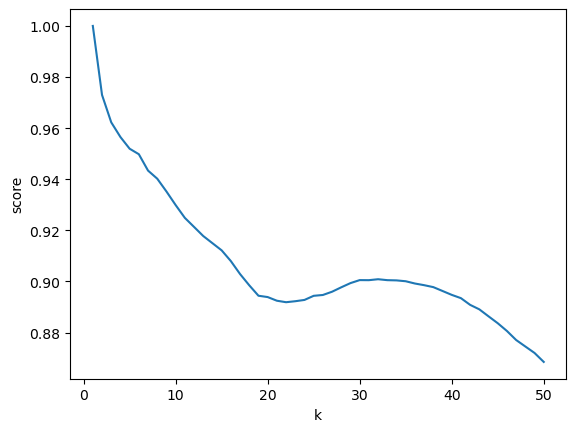

In [46]:
k_optimal = dict()
models = dict()
for i in range(50): # 50 est une valeur arbitraire
    regression = KNeighborsRegressor(n_neighbors=i+1, p=2, metric='euclidean') # p: c'est l'hyper paramètre qui definit la metric qu'on veut utiliser. Si c'est 1 c'est Manhattan, si c'est 2 c'est Euclidienne.
    models[i+1] = regression.fit(x_train, y_train)
    k_optimal[i+1] = regression.score(x_train, y_train)
    
df_score = pd.DataFrame({"k": k_optimal.keys(),"score": k_optimal.values()})
# df_score
plt.plot(df_score["k"], df_score["score"])
plt.xlabel("k")
plt.ylabel("score")
plt.show()

In [47]:
df_score.loc[df_score.score == df_score.score.max()]

,k,score
0,1,1.0


In [48]:
model = models[1]

### Evaluation du model

In [49]:
model.score(x_test, y_test) # score utilise le coefficient de determination: score = 1 - (MSE / variance); variance = sum((y_test - np.mean(y_test))**2)

0.8728227750238755

### Prediction

In [50]:
y_predict = model.predict(x_test)

In [51]:
x_test['Y'] = y_predict
x_test['Y_T'] = y_test
x_test.sort_values(by='date', inplace=True)

In [57]:
x_test

,date,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3,Y,Y_T
1,20160505,38,24,34.0,35.0,36.0,7.0,6.0,4.0,1005.65,...,1009.0,1008.0,1001.0,1000.0,1001.0,0.0,0.0,0.0,34.0,31
8,20160512,42,27,32.0,34.0,34.0,16.0,16.0,11.0,1006.78,...,1010.0,1008.0,1001.0,1002.0,1000.0,2.0,0.8,0.3,34.0,34
10,20160514,42,28,34.0,34.0,32.0,11.0,13.0,16.0,1003.56,...,1007.0,1011.0,998.0,998.0,1001.0,0.0,0.3,2.0,34.0,35
14,20160518,45,27,35.0,36.0,36.0,13.0,13.0,12.0,1001.58,...,1006.0,1008.0,995.0,999.0,1001.0,0.0,3.0,0.0,36.0,36
17,20160521,45,32,38.0,38.0,36.0,10.0,6.0,11.0,997.92,...,1002.0,1002.0,992.0,994.0,994.0,0.0,0.0,0.0,38.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,20180303,34,19,26.0,27.0,25.0,6.0,10.0,10.0,1011.18,...,1015.0,1017.0,1007.0,1008.0,1010.0,0.0,0.0,0.0,25.0,26
670,20180306,29,15,23.0,25.0,26.0,7.0,8.0,4.0,1013.96,...,1018.0,1017.0,1011.0,1007.0,1005.0,0.0,0.0,0.0,27.0,22
671,20180307,32,15,22.0,23.0,25.0,4.0,7.0,8.0,1015.39,...,1017.0,1018.0,1012.0,1011.0,1007.0,0.0,0.0,0.0,26.0,24
673,20180309,33,19,24.0,24.0,22.0,1.0,2.0,4.0,1014.41,...,1017.0,1018.0,1011.0,1011.0,1012.0,0.0,0.0,0.0,26.0,26


### Metrics

#### MSE (Mean Squared Error)

In [52]:
print("Erreur MSE: ",mean_squared_error(y_test, y_predict)) # MSE = sum((y_test - y_predict)**2) / n, n est la taille du dataset

Erreur MSE:  4.838235294117647


#### RMSE (Root Mean Squared Error)

In [53]:
print("Erreur RMSE: ",np.sqrt(mean_absolute_error(y_test, y_predict))) # RMSE = sqrt(MSE)

Erreur RMSE:  1.1694644324747672


#### MAE (Mean Absolute Error)

In [54]:
print("Erreur MAE: ",mean_absolute_error(y_test, y_predict)) # MAE = sum(abs(y_test - y_predict)) / n, n est la taille du dataset

Erreur MAE:  1.3676470588235294


#### Median Absolute Error

In [55]:
print("Median Absolute Error: ",median_absolute_error(y_test, y_predict)) # Median Absolute Error = np.median(abs(y_test - y_predict))

Median Absolute Error:  1.0


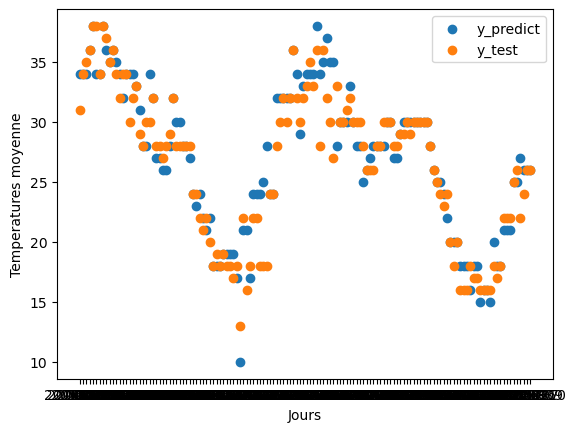

In [56]:
# error = np.abs(y_test-y_predict)
plt.scatter(x_test['date'], x_test['Y'], label='y_predict')
plt.scatter(x_test['date'], x_test['Y_T'], label='y_test')
plt.xlabel('Jours')
plt.ylabel('Temperatures moyenne')
plt.legend();